<a href="https://colab.research.google.com/github/ShubhamZoro/Data-Science/blob/main/DataScience_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas_datareader as pdr
import pandas as pd
import datetime

In [ ]:
def get_fred_data(param_list ,start_date, end_date):
  df = pdr.DataReader(param_list, 'fred', start_date, end_date)
  return df.reset_index()
df = get_fred_data(param_list=['CSUSHPISA','UNRATE'], 
                   start_date='2002-01-01', 
                   end_date='2022-01-01')




In [ ]:
df = pd.DataFrame(df)
df
df.rename(columns = {'CSUSHPISA':'House_Price_index'}, inplace = True)
df.head()


,DATE,House_Price_index,UNRATE
0,2002-01-01,117.143,5.7
1,2002-02-01,117.844,5.7
2,2002-03-01,118.687,5.7
3,2002-04-01,119.611,5.9
4,2002-05-01,120.724,5.8


In [ ]:
df.rename(columns = {'UNRATE':'Unemployment_Rate'}, inplace = True)

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt


In [ ]:
px.bar(x=df.DATE, y=df.Unemployment_Rate,color=df.Unemployment_Rate,labels=dict(x="Year", y="Unemployment Rate"))


The Above graph show how the unemployment vary over the year between 2002 to 2022.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
 

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df.DATE, y=df.Unemployment_Rate, name="Unrate"),
    secondary_y=False)

fig.add_trace(
    go.Scatter(x=df.DATE, y=df.House_Price_index, name="House_Price_Index"),
    secondary_y=True,)

fig.update_layout(
    title_text="Affect of Unemployment on House price over the year."
)

fig.update_xaxes(title_text="Date")


fig.update_yaxes(title_text="<b>Unrate</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>House_Price_Index</b>", secondary_y=True)

The above Graph show how unemployment affect the house price index what is there relation. As you can see that the Unemployment Rate increase radiply in 2020 because of Covid Epidemic.

In [ ]:
df1 = get_fred_data(param_list=['ESALEUSQ176N'], 
                   start_date='2002-01-01', 
                   end_date='2022-01-01')
df1.head()
df1.rename(columns = {'ESALEUSQ176N':'Vacant_Housing_Units_for_Sale'}, inplace = True)

In [ ]:
df1.head()

,DATE,Vacant_Housing_Units_for_Sale
0,2002-01-01,1200
1,2002-04-01,1229
2,2002-07-01,1218
3,2002-10-01,1249
4,2003-01-01,1248


In [ ]:
df.head()

,DATE,House_Price_index,Unemployment_Rate
0,2002-01-01,117.143,5.7
1,2002-04-01,119.611,5.9
2,2002-07-01,122.888,5.8
3,2002-10-01,125.734,5.7
4,2003-01-01,128.461,5.8


In [ ]:
for i in range(0,241):
    if i%3!=0:
      df.drop(i,inplace=True)
      


In [ ]:
df.reset_index(inplace = True)
df.head()


,index,DATE,House_Price_index,Unemployment_Rate
0,0,2002-01-01,117.143,5.7
1,3,2002-04-01,119.611,5.9
2,6,2002-07-01,122.888,5.8
3,9,2002-10-01,125.734,5.7
4,12,2003-01-01,128.461,5.8


In [ ]:
df.drop(['index'], axis=1,inplace=True)

In [ ]:
df.head()

,DATE,House_Price_index,Unemployment_Rate
0,2002-01-01,117.143,5.7
1,2002-04-01,119.611,5.9
2,2002-07-01,122.888,5.8
3,2002-10-01,125.734,5.7
4,2003-01-01,128.461,5.8


In [ ]:
df['Vacant_Housing_Units_for_Sale(in 1000 units)']=df1['Vacant_Housing_Units_for_Sale']

In [ ]:


df.head()

,DATE,House_Price_index,Unemployment_Rate,Vacant_Housing_Units_for_Sale(in 1000 units)
0,2002-01-01,117.143,5.7,1200
1,2002-04-01,119.611,5.9,1229
2,2002-07-01,122.888,5.8,1218
3,2002-10-01,125.734,5.7,1249
4,2003-01-01,128.461,5.8,1248


In [ ]:
px.bar(x=df.DATE, y=df['Vacant_Housing_Units_for_Sale(in 1000 units)'],color=df['Vacant_Housing_Units_for_Sale(in 1000 units)'],labels=dict(x="Year", y="Vacant_Housing_Units_for_Sale(in 1000 units)"))

In [ ]:
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split

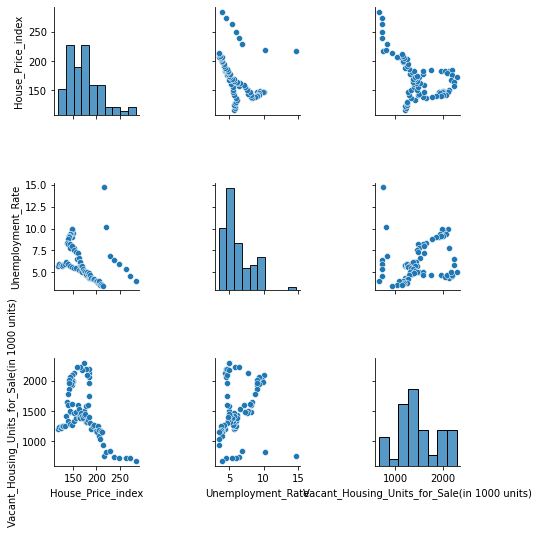

In [ ]:
sns.pairplot(df ,vars=["House_Price_index","Unemployment_Rate","Vacant_Housing_Units_for_Sale(in 1000 units)"])
plt.show()

<Figure size 720x480 with 0 Axes>

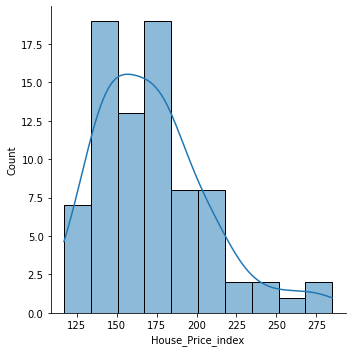

In [ ]:
plt.figure(dpi=120)
sns.displot(data=df, x="House_Price_index", kde=True )
plt.show()

Traning Data Sets and Building Model.

In [ ]:
df.duplicated().values.any()
df.isna().values.any()
import numpy as np
# for i in range(df.shape[0]):
#   df['DATE'][i]=df['DATE'][i].year*10000 +df['DATE'][i].month * 100 +df["DATE"][i].day 
print(df.columns)
features = df.drop(['House_Price_index'], axis=1)
target=df["House_Price_index"]
X_train, X_test, y_train,y_test= train_test_split(features, target, test_size=0.2)

AttributeError: ignored

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
rsquared = reg.score(X_train, y_train)

predictions = reg.predict(X_train)
residuals = (y_train - predictions)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.67


In [ ]:
features = df.drop(['House_Price_index'], axis=1)
average_vals = features.mean().values
print(average_vals)
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

[2.01168417e+07 6.14814815e+00 1.48612346e+03]


,DATE,Unemployment_Rate,Vacant_Housing_Units_for_Sale(in 1000 units)
0,2.011684e+07,6.148148,1486.123457


In [ ]:
estimate = reg.predict(property_stats)[0]


# House Price Index
est = estimate 
print(f'The House Price Index is {est:.4}')

The House Price Index is 169.9


In [ ]:
property_stats['Unemployment_Rate'] = 4.0
property_stats['Vacant_Housing_Units_for_Sale(in 1000 units)'] = 668
property_stats["DATE"]=2021*10000 +12 * 100 +13

In [ ]:
estimate = reg.predict(property_stats)[0]
est = estimate
print(f'The House Price Index {est:.4}')

The House Price Index 223.2
